In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% ! important; }<style>"))

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_22654/333272003.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
years = list(range(2000,2023))

In [3]:
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [4]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_ratings.html"

In [5]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("nba_stats_standing/{}.html".format(year),"w+") as f:
        f.write(data.text)

In [6]:
from bs4 import BeautifulSoup

In [7]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [8]:
dfs = []
for year in years:
    with open("nba_stats_standing/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    ratings_table = soup.find(id="ratings")
    ratings = pd.read_html(str(ratings_table))[0]
    ratings["Year"] = year
    
    dfs.append(ratings)

In [9]:
dfs

[    Rk                    Team Conf Div   W   L   W/L%    MOV    ORtg    DRtg  \
 0    1      Los Angeles Lakers    W   P  67  15  0.817   8.55  107.85   98.79   
 1    2  Portland Trail Blazers    W   P  59  23  0.720   6.40  108.75  101.67   
 2    3       San Antonio Spurs    W   M  53  29  0.646   5.94  105.83   99.45   
 3    4            Phoenix Suns    W   P  53  29  0.646   5.22  105.04   99.66   
 4    5               Utah Jazz    W   M  55  27  0.671   4.46  107.97  103.09   
 5    6          Indiana Pacers    E   C  56  26  0.683   4.60  109.17  104.21   
 6    7        Sacramento Kings    W   P  44  38  0.537   2.91  105.62  102.58   
 7    8  Minnesota Timberwolves    W   M  50  32  0.610   2.52  106.98  104.10   
 8    9              Miami Heat    E   A  52  30  0.634   3.11  105.39  102.08   
 9   10       Charlotte Hornets    E   C  49  33  0.598   2.67  105.00  102.22   
 10  11         New York Knicks    E   A  50  32  0.610   1.46  103.10  101.53   
 11  12         

In [10]:
nba_ratings = pd.concat(dfs)

In [11]:
nba_ratings.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [12]:
nba_ratings.to_csv("nba_ratings.csv")

In [13]:
url_start_2 = "https://www.basketball-reference.com/playoffs/"

In [14]:
import requests

data = requests.get(url_start_2)
with open("nba_champions/list.html","w+") as f :
    f.write(data.text)


In [15]:
dfs = []

with open("nba_champions/list.html") as f :
    page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    champs_table = soup.find(id="div_champions_index")
    champs = pd.read_html(str(champs_table))[0]
    
    dfs.append(champs)

nba_champs = pd.concat(dfs)
nba_champs.to_csv("nba_champs.csv")

In [16]:
nba_champs

,Year,Lg,Champion,Runner-Up,Finals MVP,Unnamed: 5,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,NaN,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,NaN,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,NaN,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,NaN,L. James (748),D. Green (222),L. James (198),L. James (5.2)
...,...,...,...,...,...,...,...,...,...,...
84,1951.0,NBA,Rochester Royals,New York Knicks,NaN,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
85,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
86,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
87,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [16]:
df = pd.read_csv('nba_ratings.csv')
df.set_index('Year', inplace = True)
df

,Unnamed: 0,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
Year,,,,,,,,,,,,,,,,
2000,0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92
2000,1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03
2000,2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37
2000,3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41
2000,4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,25,26,Detroit Pistons,E,C,23,59,0.280,-7.72,106.96,114.67,-7.71,-7.35,107.02,114.36,-7.34
2022,26,27,Orlando Magic,E,SE,22,60,0.268,-8.00,105.25,113.25,-8.00,-7.67,105.16,112.82,-7.66
2022,27,28,Oklahoma City Thunder,W,NW,24,58,0.293,-8.10,105.25,113.42,-8.18,-7.90,105.18,113.16,-7.98


In [17]:
df_champs = pd.read_csv('nba_champs.csv')
df_champs.drop(labels=["Unnamed: 0","Unnamed: 5"], axis=1, inplace = True)
df_champs

,Year,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
...,...,...,...,...,...,...,...,...,...
84,1951.0,NBA,Rochester Royals,New York Knicks,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
85,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
86,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
87,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [18]:
df_champs.set_index("Year", inplace = True)

In [19]:
df_champs = df_champs.loc[2022:2000]

In [20]:
df_champs

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [21]:
df_champs.dropna(how='all')

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [22]:
df_champs

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [23]:
df.drop(labels="Div", axis=1, inplace = True)
df_champs.drop(labels="Lg", axis=1, inplace = True)

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_22654/3632358297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs.drop(labels="Lg", axis=1, inplace = True)


In [24]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


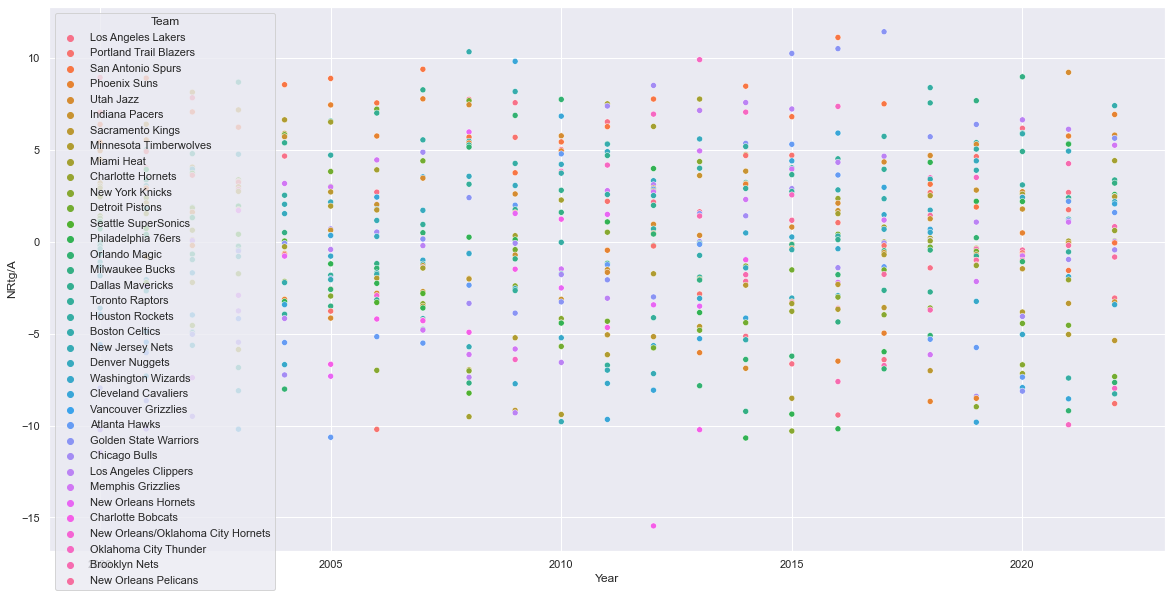

In [25]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale = 1)
fig = sns.scatterplot(data = df , x="Year", y="NRtg/A", hue = "Team")


In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [27]:
df_champs = df_champs[df_champs.index.notnull()]

In [28]:
df_champs["Year"] = df_champs.index.astype('int64')
df_champs.set_index("Year", inplace = True)


/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_22654/415462912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs["Year"] = df_champs.index.astype('int64')


In [29]:
df.sort_index(ascending=False)
df.drop(labels="Unnamed: 0", axis=1 , inplace = True)

In [30]:
df_champs.sort_index(inplace = True)

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_22654/581753011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs.sort_index(inplace = True)


In [46]:
df["Champion"] = ""
champions_list = []
n = 0
c = 0
# y = 0
while df.index[n] == df_champs.index[c] :
    for x in df.loc[df.index[n] ,"Team"] :
        if (x == df_champs.loc[df_champs.index[c], "Champion"]) == True:
            champions_list.append("True")
            
        else : 
            champions_list.append("False")
  
    if df.index[n] < 2005: 
        n += 29
    elif df.index[n] >= 2005:
        n += 30
    
    c += 1
    if c == 23:
        break
df["Champion"] = champions_list

In [47]:
df

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2000,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,True
2000,2,Portland Trail Blazers,W,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,False
2000,3,San Antonio Spurs,W,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,False
2000,4,Phoenix Suns,W,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,False
2000,5,Utah Jazz,W,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,False
2000,6,Indiana Pacers,E,56,26,0.683,4.60,109.17,104.21,4.95,4.16,109.05,104.58,4.47,False
2000,7,Sacramento Kings,W,44,38,0.537,2.91,105.62,102.58,3.04,3.04,105.61,102.43,3.19,False
2000,8,Minnesota Timberwolves,W,50,32,0.610,2.52,106.98,104.10,2.87,2.67,107.05,104.03,3.02,False
2000,9,Miami Heat,E,52,30,0.634,3.11,105.39,102.08,3.31,2.75,105.16,102.24,2.92,False


<AxesSubplot:xlabel='Team', ylabel='NRtg/A'>

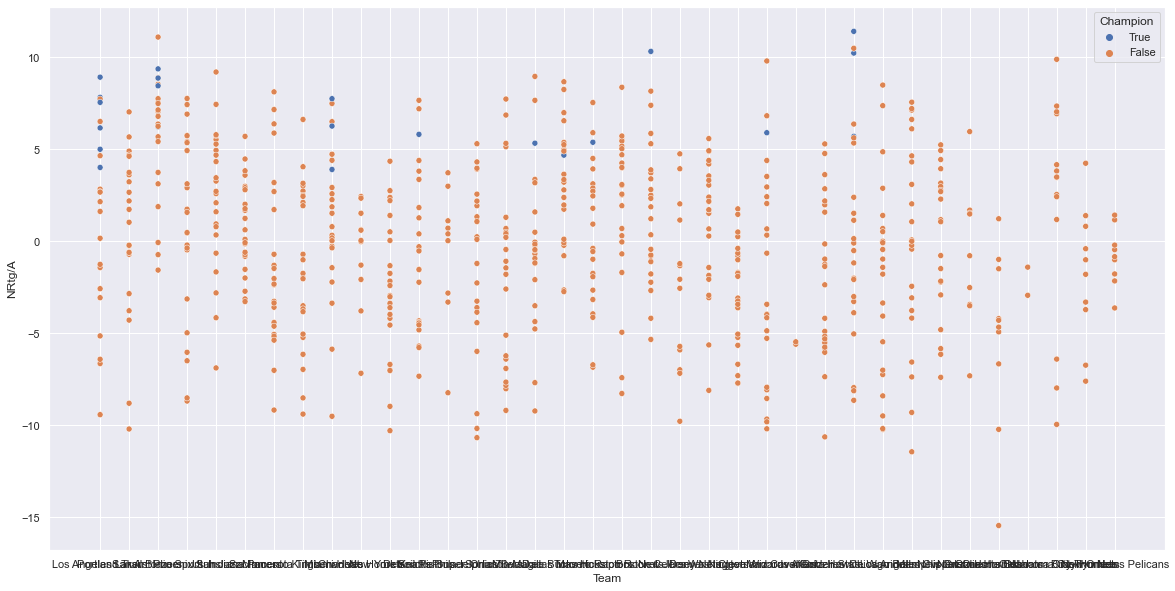

In [50]:
sns.scatterplot(x=df['Team'], y=df['NRtg/A'], hue=df['Champion'])

In [58]:
df_upper = df.loc[df['NRtg/A'] > 0]

<AxesSubplot:xlabel='Team', ylabel='NRtg/A'>

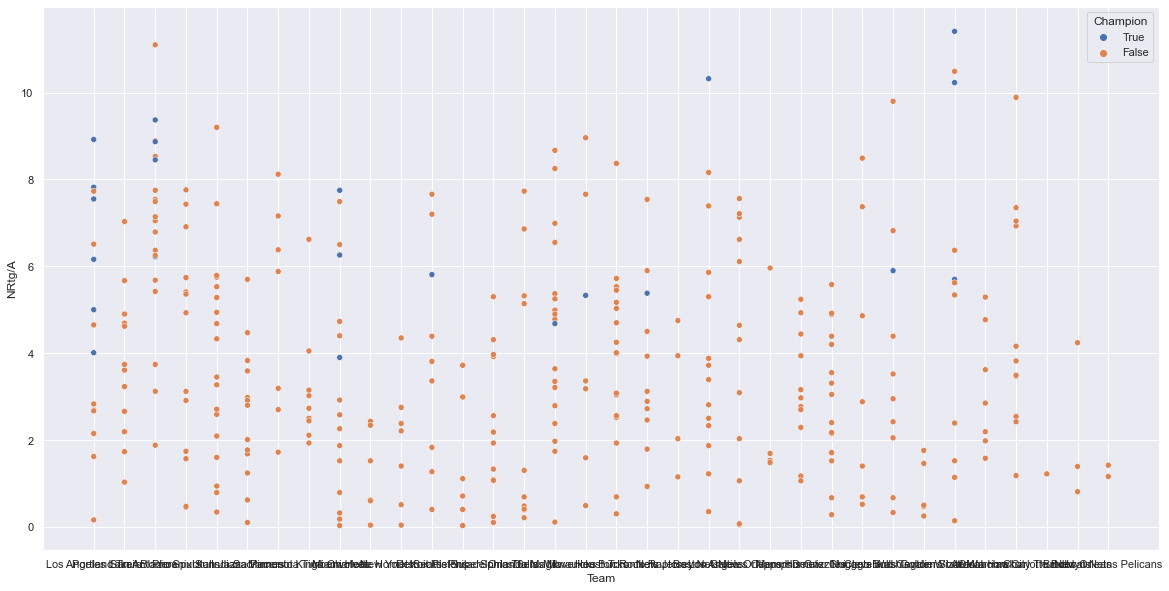

In [59]:
sns.scatterplot(x=df_upper['Team'], y=df_upper['NRtg/A'], hue=df_upper['Champion'])

In [101]:
df.loc[(df['NRtg/A'] > 0) & (df['Champion'] == "True")].sort_values(by='NRtg', ascending=False)

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2017,1,Golden State Warriors,W,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41,True
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True
2007,1,San Antonio Spurs,W,58,24,0.707,8.43,110.11,100.64,9.47,8.35,109.84,100.47,9.37,True
2000,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,True
2005,1,San Antonio Spurs,W,59,23,0.720,7.80,108.45,99.59,8.85,7.84,108.18,99.31,8.87,True
2013,2,Miami Heat,E,66,16,0.805,7.87,113.43,104.77,8.67,7.03,113.28,105.53,7.75,True
2014,1,San Antonio Spurs,W,62,20,0.756,7.72,111.09,102.93,8.16,7.99,110.98,102.53,8.45,True
2009,3,Los Angeles Lakers,W,65,17,0.793,7.66,113.43,105.29,8.14,7.11,113.00,105.45,7.55,True


In [84]:
df_filt = df.loc[(df['NRtg/A'] >= 3.90) & (df['Rk']<= 4)]
df_filt.loc[(df_filt['Champion'] == "True")].sort_values(by='NRtg/A', ascending=False) # 5.33

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2017,1,Golden State Warriors,W,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41,True
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True
2007,1,San Antonio Spurs,W,58,24,0.707,8.43,110.11,100.64,9.47,8.35,109.84,100.47,9.37,True
2000,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,True
2005,1,San Antonio Spurs,W,59,23,0.720,7.80,108.45,99.59,8.85,7.84,108.18,99.31,8.87,True
2014,1,San Antonio Spurs,W,62,20,0.756,7.72,111.09,102.93,8.16,7.99,110.98,102.53,8.45,True
2002,2,Los Angeles Lakers,W,58,24,0.707,7.12,110.29,102.52,7.77,7.15,110.12,102.30,7.82,True
2013,2,Miami Heat,E,66,16,0.805,7.87,113.43,104.77,8.67,7.03,113.28,105.53,7.75,True


In [88]:
#condition NRtg/A > 5.33 , Rk <= 4
df_MOV= df.loc[(df['NRtg/A'] >= 5.33) & (df['Rk']<= 4)]
df_MOV.sort_values(by='MOV', ascending=False) #lowest MOV 5.41

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2017,1,Golden State Warriors,W,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41,True
2016,2,Golden State Warriors,W,73,9,0.890,10.76,115.18,104.32,10.86,10.38,115.01,104.53,10.49,False
2016,1,San Antonio Spurs,W,67,15,0.817,10.63,111.04,99.55,11.49,10.28,110.59,99.49,11.10,False
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True
2020,1,Milwaukee Bucks,E,56,17,0.767,10.08,112.98,103.36,9.62,9.41,112.69,103.73,8.96,False
2021,1,Utah Jazz,W,52,20,0.722,9.25,118.42,108.94,9.48,8.96,118.23,109.04,9.20,False
2013,1,Oklahoma City Thunder,W,60,22,0.732,9.21,113.30,103.35,9.95,9.15,113.21,103.33,9.89,False
2009,1,Cleveland Cavaliers,E,66,16,0.805,8.93,113.29,103.20,10.09,8.68,113.18,103.37,9.80,False


In [102]:
df_winpect =  df.loc[(df['NRtg/A'] >= 5.33) & (df['Rk']<= 4) & (df['MOV'] >= 5.41)].sort_values(by='W/L%',ascending=False) #W/L% >= 0.639
df_winpect.sort_values(by='NRtg/A',ascending=False)

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2017,1,Golden State Warriors,W,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41,True
2016,1,San Antonio Spurs,W,67,15,0.817,10.63,111.04,99.55,11.49,10.28,110.59,99.49,11.10,False
2016,2,Golden State Warriors,W,73,9,0.890,10.76,115.18,104.32,10.86,10.38,115.01,104.53,10.49,False
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True
2013,1,Oklahoma City Thunder,W,60,22,0.732,9.21,113.30,103.35,9.95,9.15,113.21,103.33,9.89,False
2009,1,Cleveland Cavaliers,E,66,16,0.805,8.93,113.29,103.20,10.09,8.68,113.18,103.37,9.80,False
2007,1,San Antonio Spurs,W,58,24,0.707,8.43,110.11,100.64,9.47,8.35,109.84,100.47,9.37,True
2021,1,Utah Jazz,W,52,20,0.722,9.25,118.42,108.94,9.48,8.96,118.23,109.04,9.20,False


In [148]:
#condition NRtg/A > 5.33 ,NRtg >= 5.63,  Rk <= 4,  MOV >= 5.41, W/L% >= 0.639, ORtg >= 103.18, DRtg >= 102.62
df_final = df.loc[(df['NRtg/A'] >= 5.63) & (df['Rk']<= 4) & (df['MOV'] >= 5.41) & (df['W/L%'] >= 0.659) & (df['ORtg'] >= 103.18) & (df['DRtg'] <= 108.43)]
df_final.sort_values(by='Champion',ascending=True)

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2010,2,Cleveland Cavaliers,E,61,21,0.744,6.52,112.27,105.07,7.21,6.17,112.29,105.47,6.82,False
2010,1,Orlando Magic,E,59,23,0.720,7.49,112.13,104.00,8.13,7.12,112.02,104.28,7.73,False
2020,4,Toronto Raptors,E,53,19,0.736,6.24,112.02,105.85,6.18,5.97,111.99,106.08,5.90,False
2011,1,Miami Heat,E,58,24,0.707,7.46,112.62,104.35,8.27,6.76,112.43,104.94,7.49,False
2011,2,Chicago Bulls,E,62,20,0.756,7.32,109.30,101.07,8.23,6.53,109.02,101.65,7.37,False
2011,3,Los Angeles Lakers,W,57,25,0.695,6.11,111.61,105.00,6.61,6.01,111.40,104.89,6.51,False
2011,4,San Antonio Spurs,W,61,21,0.744,5.71,112.31,106.23,6.07,5.86,112.22,105.97,6.25,False
2012,1,Chicago Bulls,E,50,16,0.758,8.18,108.22,98.89,9.33,7.43,108.21,99.72,8.49,False
2012,2,San Antonio Spurs,W,50,16,0.758,7.17,111.45,103.83,7.62,7.28,111.35,103.60,7.75,False


In [189]:
df_temp =df_final.loc[(df_final['W/L%'] >= 0.707) & (df_final['Rk'] <= 3) & (df_final['W'] >= 58) & (df_final['NRtg'] >= 8.67) & (df_final['MOV'] >= 7.80)]
df_temp.groupby(['NRtg'])['Champion'].count()
df_temp.sort_values(by='DRtg/A',ascending=False) #Ntg >= 8.67

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Champion
Year,,,,,,,,,,,,,,,
2013,2,Miami Heat,E,66,16,0.805,7.87,113.43,104.77,8.67,7.03,113.28,105.53,7.75,True
2017,1,Golden State Warriors,W,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41,True
2016,2,Golden State Warriors,W,73,9,0.890,10.76,115.18,104.32,10.86,10.38,115.01,104.53,10.49,False
2009,1,Cleveland Cavaliers,E,66,16,0.805,8.93,113.29,103.20,10.09,8.68,113.18,103.37,9.80,False
2013,1,Oklahoma City Thunder,W,60,22,0.732,9.21,113.30,103.35,9.95,9.15,113.21,103.33,9.89,False
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True
2007,1,San Antonio Spurs,W,58,24,0.707,8.43,110.11,100.64,9.47,8.35,109.84,100.47,9.37,True
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True
2016,1,San Antonio Spurs,W,67,15,0.817,10.63,111.04,99.55,11.49,10.28,110.59,99.49,11.10,False


In [164]:
df_final.['Champion'].count() #52/66

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
Champion,,,,,,,,,,,,,,
False,50,50,50,50,50,50,50,50,50,50,50,50,50,50
True,16,16,16,16,16,16,16,16,16,16,16,16,16,16


63.63636363636363


1.0

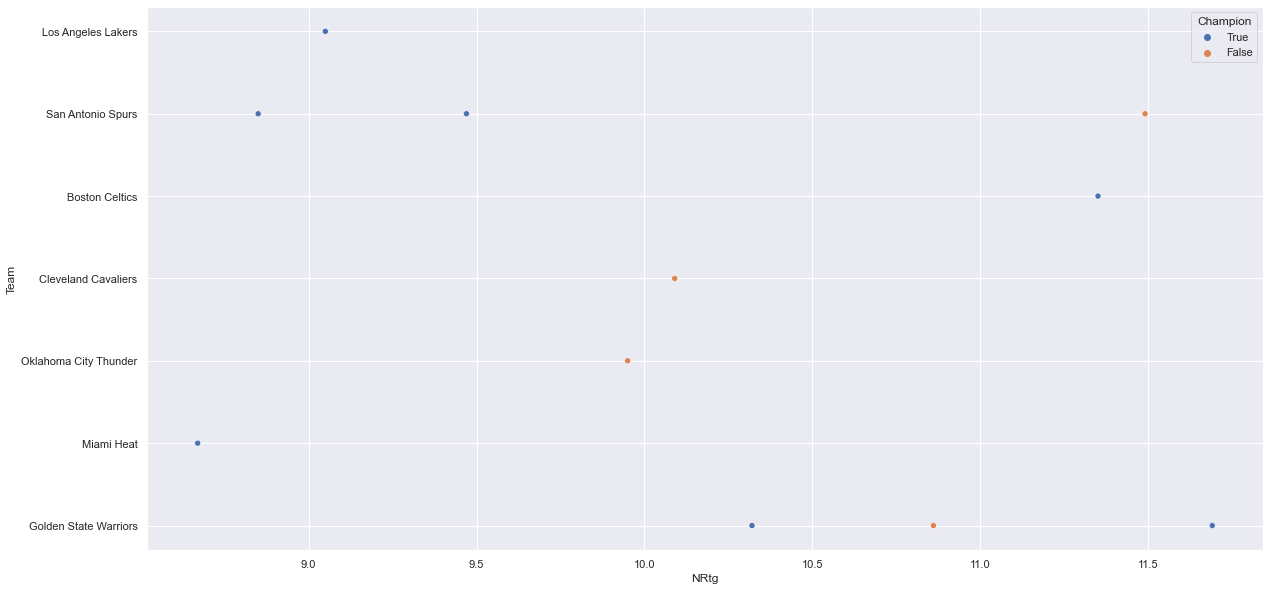

In [198]:
sns.scatterplot(x=df_temp['NRtg'], y=df_temp['Team'], hue=df_temp['Champion'])
print(len(df_temp.loc[df_temp["Champion"]== "True"])/len(df_temp)*100)
#63.63636363636363% Chance of Winning it all 
1. MOV  >= 7.80
2. NRtg >= 8.67
3. W >= 58 
4. Rk <= 3
5. W/L% >= 0.707
6. DRtg <= 108.43
7. ORtg >= 103.18

In [197]:
print(len(df_temp.loc[df_temp["Champion"]== "True"])/len(df_temp)*100)

63.63636363636363
